In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(123)

In [4]:
n_samples=1000
class_0_ratio= 0.9
n_class_0= int(n_samples* class_0_ratio)
n_class_1= n_samples-n_class_0

In [6]:
class_0= pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size= n_class_0),
    'feature_2':np.random.normal(loc=0, scale=1, size= n_class_0),
    'target': [0]*n_class_0
})

class_1= pd.DataFrame({
    'feature_1': np.random.normal(loc=1, scale=2, size= n_class_1),
    'feature_2': np.random.normal(loc=1, scale=2, size= n_class_1),
    'target':[1]* n_class_1
})

df= pd.concat([class_0, class_1]).reset_index(drop=True)

In [7]:
df.head()

,feature_1,feature_2,target
0,-0.300232,0.667532,0
1,-0.632261,0.100458,0
2,-0.204317,-0.012610,0
3,0.213696,0.219907,0
4,1.033878,0.813623,0


In [8]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

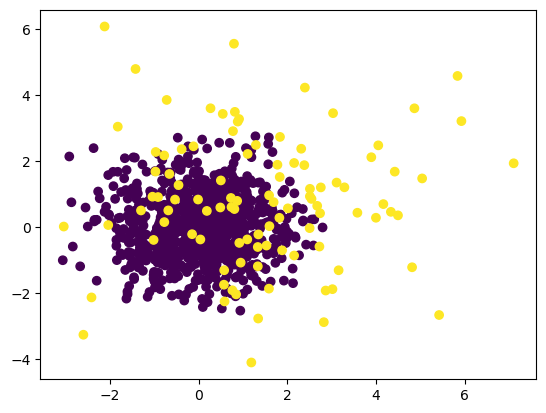

In [9]:
plt.scatter(df['feature_1'], df['feature_2'], c= df['target'])

## two ways of handling missing values
1. upsampling
2. downsampling

In [12]:
majority_class= df[df['target']==0]
minority_class= df[df['target']==1]

## upsampling minority class 

In [14]:
from sklearn.utils import resample
df_minority_upsampled= resample(minority_class,replace=True, n_samples= len(majority_class), random_state=123)

In [15]:
df_upsampled= pd.concat([majority_class, df_minority_upsampled])

In [16]:
df_upsampled.shape

(1800, 3)

In [18]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

<Axes: xlabel='feature_1', ylabel='feature_2'>

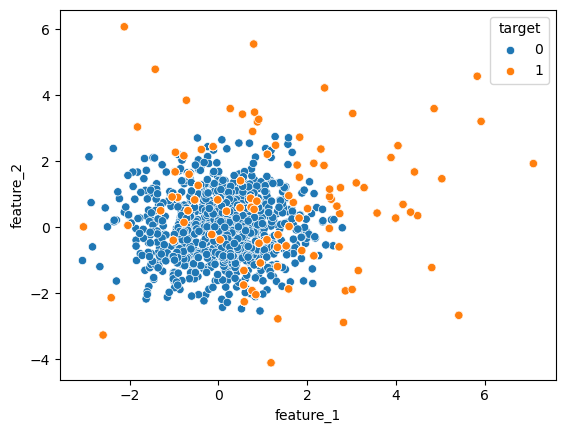

In [19]:
sns.scatterplot(x='feature_1', y='feature_2', hue='target', data=df_upsampled)

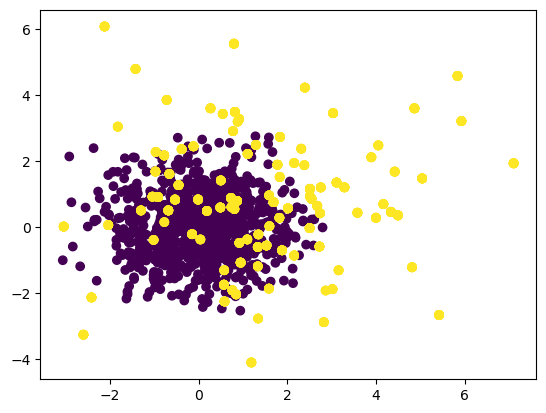

In [21]:
plt.scatter(df_upsampled['feature_1'], df_upsampled['feature_2'], c= df_upsampled['target'])

## now we will do downsampling